# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
pd

<module 'pandas' from '/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/__init__.py'>

In [6]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [9]:
# your code here
df.size

12367110

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
#your code here
df['PHYSHLTH'] = np.where(df['PHYSHLTH']==88, 0 , df['PHYSHLTH'])

In [12]:
np.where(df['PHYSHLTH'] == 77.0, np.nan, df['PHYSHLTH'])
np.where(df['PHYSHLTH'] == 99.0, np.nan, df['PHYSHLTH'])
df['PHYSHLTH'].dropna().size

34545

In [13]:
df = df[(df['PHYSHLTH'] != 77.0) & (df['PHYSHLTH']!=99.0)]

In [14]:
df['PHYSHLTH'].size

33747

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [15]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [16]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [17]:
df['PHYSHLTH'].isna().sum()

0

In [18]:
# descriptive statistics


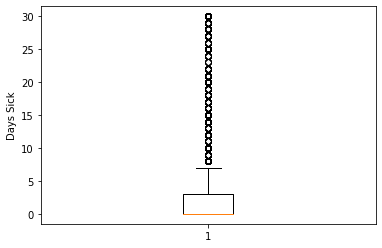

In [19]:
fig, ax = plt.subplots()
ax.boxplot(df['PHYSHLTH'])
ax.set_ylabel("Days Sick")

plt.show()

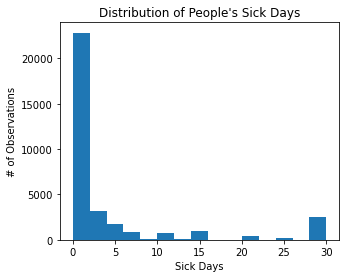

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(df['PHYSHLTH'], bins = 15)
ax.set_ylabel("# of Observations")
ax.set_xlabel("Sick Days")
ax.set_title("Distribution of People's Sick Days")
plt.show()

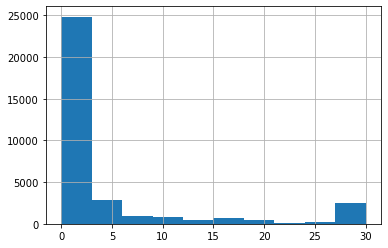

In [21]:
df['PHYSHLTH'].hist();

In [22]:
# graph the distribution of data


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [23]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()


_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [24]:
#9 -> Conn, 34 -> NJ, 36 -> NY
stateDict = {9: 'CT', 34: 'NJ', 36: 'NY'}
df['_STATE'] = df['_STATE'].map(stateDict)

Text(0.5, 1.0, 'Comparing Health by State')

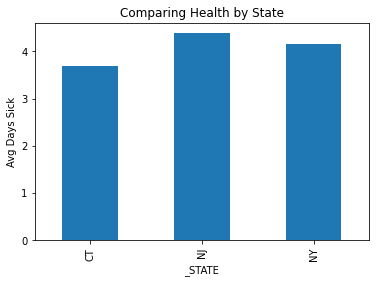

In [25]:
fig, ax = plt.subplots()
ax = df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')
ax.set_ylabel("Avg Days Sick")
ax.set_title("Comparing Health by State")

In [26]:
# code to graph those averages using matplotlib


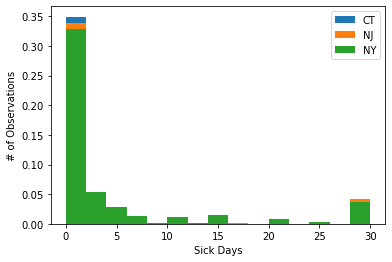

In [27]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
ax.hist(df[df['_STATE']=='CT']['PHYSHLTH'], bins=15,  density=True, histtype='barstacked', label='CT')
ax.hist(df[df['_STATE']=='NJ']['PHYSHLTH'], bins=15, density=True, histtype='barstacked', label='NJ')
ax.hist(df[df['_STATE']=='NY']['PHYSHLTH'], bins=15, density=True, histtype='barstacked', label='NY')
ax.legend()
ax.set_ylabel("# of Observations")
ax.set_xlabel("Sick Days")
plt.show();

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [28]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>12, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [29]:
df.groupby('_STATE').chron.mean()

_STATE
CT    0.112744
NJ    0.136935
NY    0.126810
Name: chron, dtype: float64

In [30]:
# code to calculate averages per state


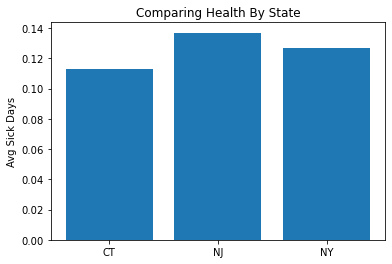

In [31]:
chron_mean_values = df.groupby('_STATE').chron.mean().values
fig, ax = plt.subplots()
ax.bar( x = df.groupby('_STATE').chron.mean().index
        ,height = df.groupby('_STATE').chron.mean())
ax.set_ylabel("Avg Sick Days")
ax.set_title("Comparing Health By State");

In [32]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

SMOKDAY 2
1 -> Every Day
2 -> Some Days
3 -> Not at All
7 -> Don't Know
9 -> Refused


In [33]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [34]:
df['SMOKDAY2'].value_counts().sum()

13468

In [35]:
df['SMOKDAY2'].isna().sum()

20279

SMOKE100
1 -> Every Day
2 -> No ->UseNOW3
3 -> Don’t know/Not Sure—Go to Section 09.05 USENOW3
7 -> Refused—Go to Section 09.05 USENOW3

In [36]:
df['SMOKERS'] = df['SMOKDAY2']

In [37]:
conditions = [df['SMOKE100']==2,
              df['SMOKE100']==7,
              df['SMOKE100']==9]
choices = [3,7,9]
df['SMOKERS'] = np.select(conditions,choices,df['SMOKERS'])

In [38]:
df['SMOKERS'].isna().sum()

1388

In [39]:
df['SMOKERS'].value_counts().sum()

32359

In [40]:
df['SMOKERS'].value_counts()

3.0    28179
1.0     2611
2.0     1336
7.0      167
9.0       66
Name: SMOKERS, dtype: int64

In [41]:
df['SMOKERS'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: SMOKERS, dtype: float64

In [42]:
# your code here

In [43]:
smokeDict = {1: 'Everyday', 2: 'Some Days', 3: 'Not at all', 7: 'Don\'t Know', 9: 'Refused'}
df['SMOKERS'] = df['SMOKERS'].map(smokeDict)

In [44]:
# code to graph those proportion of differen smoking groups using matplotlib
smokers_avg = df['SMOKERS'].value_counts(normalize=True)
smokers_avg

Not at all    0.870824
Everyday      0.080689
Some Days     0.041287
Don't Know    0.005161
Refused       0.002040
Name: SMOKERS, dtype: float64

SMOKDAY 2
1 -> Every Day
2 -> Some Days
3 -> Not at All
7 -> Don't Know
9 -> Refused


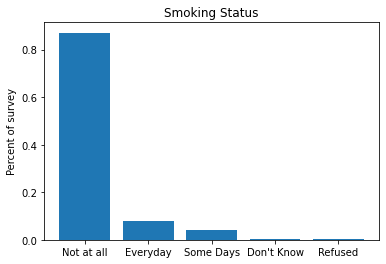

In [45]:
fig, ax = plt.subplots()
# x_names = ['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"]
ax.bar(x=smokers_avg.index, height = smokers_avg.values)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')
plt.show();

In [46]:
# your code here

In [47]:
#graph showing the breakdown of smokers per state
state_smokers_avg = df.groupby('_STATE')['SMOKERS'].value_counts(normalize=True)
state_smokers_avg


_STATE  SMOKERS   
CT      Not at all    0.886025
        Everyday      0.070522
        Some Days     0.034362
        Don't Know    0.006493
        Refused       0.002597
NJ      Not at all    0.867227
        Everyday      0.081435
        Some Days     0.043384
        Don't Know    0.006688
        Refused       0.001265
NY      Not at all    0.860865
        Everyday      0.088976
        Some Days     0.045374
        Don't Know    0.002481
        Refused       0.002304
Name: SMOKERS, dtype: float64

In [48]:
state_smokers_avg = df.groupby('_STATE')['SMOKERS'].value_counts(normalize=True)
pd.DataFrame(state_smokers_avg)

SMOKERS
_STATE SMOKERS             
CT     Not at all  0.886025
       Everyday    0.070522
       Some Days   0.034362
       Don't Know  0.006493
       Refused     0.002597
NJ     Not at all  0.867227
       Everyday    0.081435
       Some Days   0.043384
       Don't Know  0.006688
       Refused     0.001265
NY     Not at all  0.860865
       Everyday    0.088976
       Some Days   0.045374
       Don't Know  0.002481
       Refused     0.002304

<AxesSubplot:xlabel='_STATE'>

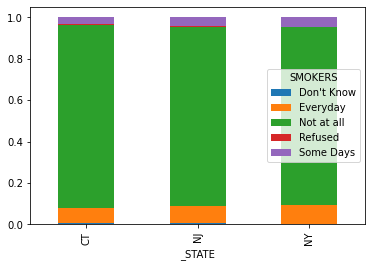

In [49]:
# code to graph these averages sick days for each category of smoking status
smokers_by_state = df.groupby("_STATE").SMOKERS.value_counts(normalize=True)
smokers_by_state.unstack().plot(kind='bar', stacked=True)




(0.0, 7.0)

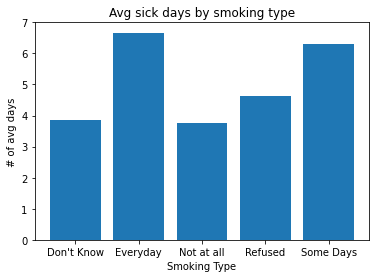

In [50]:
avg_days_by_smoker = df.groupby("SMOKERS")['PHYSHLTH'].mean()
fig, ax = plt.subplots()
ax.bar(x=avg_days_by_smoker.index,
       height = avg_days_by_smoker.values)
ax.set_title("Avg sick days by smoking type")
ax.set_xlabel("Smoking Type")
ax.set_ylabel("# of avg days")
ax.set_ylim(0,7)

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [51]:
# code here to clean up the ALCDAY5 responses
df['ALCDAY5'].value_counts()

888.0    12631
201.0     2968
202.0     2300
101.0     1565
203.0     1323
102.0     1217
230.0     1148
205.0     1147
204.0     1132
210.0      834
103.0      773
107.0      697
220.0      641
215.0      585
206.0      385
104.0      380
208.0      363
105.0      346
207.0      276
225.0      263
777.0      209
999.0      181
212.0      142
106.0      109
228.0       56
214.0       51
229.0       31
209.0       26
227.0       24
218.0       18
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [52]:
df['ALCDAY5'].describe()

count    31922.000000
mean       468.457177
std        350.129601
min        101.000000
25%        201.000000
50%        212.000000
75%        888.000000
max        999.000000
Name: ALCDAY5, dtype: float64

In [53]:
df['ALCDAY5'].isna().sum()

1825

In [54]:
conditions = [(df['ALCDAY5']>=101) & (df['ALCDAY5'] <= 107),
              (df['ALCDAY5']>=201) & (df['ALCDAY5'] <= 230),
              (df['ALCDAY5']==888),
              (df['ALCDAY5']==777),
              (df['ALCDAY5']==999)]

choices = [(df['ALCDAY5']-100)*4,
           (df['ALCDAY5']-200),
           0,
           np.nan,
           np.nan]

df['ALCOHOL_PER_MONTH'] = np.select(conditions,choices, df['ALCDAY5'])

In [55]:
#descriptive statistics of cleaned data
df['ALCOHOL_PER_MONTH'].describe()

count    31532.000000
mean         5.339116
std          8.194317
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCOHOL_PER_MONTH, dtype: float64

In [56]:
df['ALCOHOL_PER_MONTH'].value_counts()

0.0     12631
1.0      2968
4.0      2697
2.0      2300
8.0      1580
3.0      1323
30.0     1148
5.0      1147
20.0      987
12.0      915
10.0      834
28.0      753
15.0      585
16.0      395
6.0       385
7.0       276
25.0      263
24.0      123
14.0       51
29.0       31
9.0        26
27.0       24
18.0       18
26.0       15
22.0       13
21.0       13
13.0       11
11.0       10
17.0        7
23.0        2
19.0        1
Name: ALCOHOL_PER_MONTH, dtype: int64

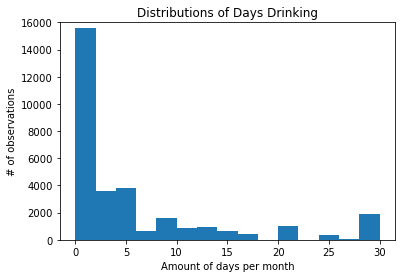

In [57]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
with np.errstate(invalid='ignore'):
    ax.hist(x = df['ALCOHOL_PER_MONTH'], bins = 15)
ax.set_title('Distributions of Days Drinking')
ax.set_xlabel('Amount of days per month')
ax.set_ylabel('# of observations')
ax.set_ylim(0,16000);

In [58]:
# code to calculate averages per state
df.groupby('_STATE').ALCOHOL_PER_MONTH.mean()

_STATE
CT    6.036227
NJ    4.913481
NY    5.139898
Name: ALCOHOL_PER_MONTH, dtype: float64

In [59]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df[['PHYSHLTH','ALCOHOL_PER_MONTH']].corr()['PHYSHLTH']


PHYSHLTH             1.000000
ALCOHOL_PER_MONTH   -0.090443
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.